In [3]:
%pylab inline

Populating the interactive namespace from numpy and matplotlib


/home/diogo/programs/anaconda3/lib/python3.5/site-packages/IPython/core/magics/pylab.py:161: UserWarning: pylab import has clobbered these variables: ['display']
`%matplotlib` prevents importing * from pylab and numpy
  "\n`%matplotlib` prevents importing * from pylab and numpy"


In [4]:
import numpy as np
import matplotlib.pyplot as plt
import obspy as op
import glob
import os
import fnmatch
import shutil
import matplotlib.gridspec as gridspec
from scipy import signal,stats,spatial,misc
from obspy.taup import TauPyModel
import time
from IPython import display
import matplotlib.gridspec as gridspec
from obspy.clients.fdsn import Client
from obspy.clients.iris import Client as OldIris_Client
from obspy.core.util import NamedTemporaryFile
from mpl_toolkits.basemap import Basemap
import matplotlib.mlab as mlab
import itertools
from obspy import UTCDateTime
from matplotlib.cbook import get_sample_data

<h3 align="center">Recolhendo as Funções do Receptor</h3>

In [5]:
STA = ['BPPF','BUCO','GENI','GRJU','PRDT','STSN','STSR','TRZN']

In [6]:
datalistr = []
datalistSr = []
dir_listr = []
for root, dirs, files in os.walk('/home/diogo/dados_doutorado/parnaiba_basin/redeBP-BB/event_data'):
    for datafile in files:
        if datafile.endswith('.eqr'):
            datalistr.append(os.path.join(root, datafile))
datalistSr = sorted(datalistr)

datalistt = []
datalistSt = []
dir_listt = []
for root, dirs, files in os.walk('/home/diogo/dados_doutorado/parnaiba_basin/redeBP-BB/event_data'):
    for datafile in files:
        if datafile.endswith('.eqt'):
            datalistt.append(os.path.join(root, datafile))
datalistSt = sorted(datalistt)

In [7]:
a1r = []
a25r = []
for i,j in enumerate(datalistSr):
    if 'a=1.0' in j:
        a1r.append(j)
    else:
        a25r.append(j)

a1t = []
a25t = []
for i,j in enumerate(datalistSt):
    if 'a=1.0' in j:
        a1t.append(j)
    else:
        a25t.append(j)

In [8]:
a1r_name = [i.split('/')[11] for i in a1r]
a1t_name = [i.split('/')[11] for i in a1t]
a25r_name = [i.split('/')[11] for i in a25r]
a25t_name = [i.split('/')[11] for i in a25t]

In [9]:
RF_list_r = [[],[],[],[],[],[],[],[]]
for i,j in enumerate(a1r):
    for l,k in enumerate(STA):
        if k in j:
            RF_list_r[l].append(j)
            
RF_list_r_25 = [[],[],[],[],[],[],[],[]]
for i,j in enumerate(a25r):
    for l,k in enumerate(STA):
        if k in j:
            RF_list_r_25[l].append(j)

<h3 align="center">Separando as Funções do Receptor por Estação</h3>

In [10]:
RF_list_t = [[],[],[],[],[],[],[],[]]
for i,j in enumerate(a1t):
    for l,k in enumerate(STA):
        if k in j:
            RF_list_t[l].append(j)
            
RF_list_t_25 = [[],[],[],[],[],[],[],[]]
for i,j in enumerate(a25t):
    for l,k in enumerate(STA):
        if k in j:
            RF_list_t_25[l].append(j)

<h3 align="center">Separando as Funções do Receptor pela distância Epicentral (gcarc)</h3>

BPPF = 0 ,BUCO = 1, GENI = 2, GRJU = 3, PRDT = 4, STNS = 5, STSR = 6, TRZN = 7

In [11]:
z = 0

<h3 align="center">a = 1.0</h3>

In [12]:
RF = []
RF_name_r = []

for i,j in enumerate(RF_list_r[z]):
    a = op.read(j)
    if a[0].stats.sac.gcarc > 30:
        RF += op.read(j)
        RF_name_r.append(j.split('/')[11])

In [13]:
RF_name = [i.split('.eqr')[0] for i in RF_name_r]

In [14]:
TF = []
for i,j in enumerate(RF_list_t[z]):
    for l,k in enumerate(RF_name):
        if k in j:
            TF += op.read(j)

<h3 align="center">a = 2.5</h3>

In [15]:
RF_25 = []
RF_name_r_25 = []

for i,j in enumerate(RF_list_r_25[z]):
    a = op.read(j)
    if a[0].stats.sac.gcarc > 30:
        RF_25 += op.read(j)
        RF_name_r_25.append(j.split('/')[11])

In [16]:
RF_name_25 = [i.split('.eqr')[0] for i in RF_name_r_25]

In [17]:
TF_25 = []
for i,j in enumerate(RF_list_t_25[z]):
    for l,k in enumerate(RF_name_25):
        if k in j:
            TF_25 += op.read(j)

<h3 align="center">Separando as Funções do Receptor pela porcentagem da deconvolução</h3>

<h3 align="center">a = 1.0</h3>

In [18]:
RF_30_st = op.Stream()
RF_30 = []
TF_30 = []
RF_name_30 = []
for i,j in enumerate(RF):
    if j.stats.sac.user5 > 85:
        RF_30_st.append(j)
        TF_30.append(TF[i])
        RF_name_30.append(RF_name[i])

In [19]:
RF_30_st.normalize(global_max=False)

11 Trace(s) in Stream:
.BPPF..Radial | 1969-12-31T23:59:50.000000Z - 1970-01-01T00:03:14.700000Z | 10.0 Hz, 2048 samples
.BPPF..Radial | 1969-12-31T23:59:50.000000Z - 1970-01-01T00:03:14.700000Z | 10.0 Hz, 2048 samples
.BPPF..Radial | 1969-12-31T23:59:50.000000Z - 1970-01-01T00:03:14.700000Z | 10.0 Hz, 2048 samples
.BPPF..Radial | 1969-12-31T23:59:50.000000Z - 1970-01-01T00:03:14.700000Z | 10.0 Hz, 2048 samples
.BPPF..Radial | 1969-12-31T23:59:50.000000Z - 1970-01-01T00:03:14.700000Z | 10.0 Hz, 2048 samples
.BPPF..Radial | 1969-12-31T23:59:50.000000Z - 1970-01-01T00:03:14.700000Z | 10.0 Hz, 2048 samples
.BPPF..Radial | 1969-12-31T23:59:50.000000Z - 1970-01-01T00:03:14.700000Z | 10.0 Hz, 2048 samples
.BPPF..Radial | 1969-12-31T23:59:50.000000Z - 1970-01-01T00:03:14.700000Z | 10.0 Hz, 2048 samples
.BPPF..Radial | 1969-12-31T23:59:50.000000Z - 1970-01-01T00:03:14.700000Z | 10.0 Hz, 2048 samples
.BPPF..Radial | 1969-12-31T23:59:50.000000Z - 1970-01-01T00:03:14.700000Z | 10.0 Hz, 2048 sampl

In [20]:
for i,j in enumerate(RF_30_st):
    RF_30.append(j)

<h3 align="center">a = 2.5</h3>

In [21]:
RF_30_25_st = op.Stream()
RF_30_25 = []
TF_30_25 = []
RF_name_30_25 = []
for i,j in enumerate(RF_25):
    if j.stats.sac.user5 > 85:
        RF_30_25_st.append(j)
        TF_30_25.append(TF_25[i])
        RF_name_30_25.append(RF_name_25[i])

In [22]:
RF_30_25_st.normalize(global_max=False)

11 Trace(s) in Stream:
.BPPF..Radial | 1969-12-31T23:59:50.000000Z - 1970-01-01T00:03:14.700000Z | 10.0 Hz, 2048 samples
.BPPF..Radial | 1969-12-31T23:59:50.000000Z - 1970-01-01T00:03:14.700000Z | 10.0 Hz, 2048 samples
.BPPF..Radial | 1969-12-31T23:59:50.000000Z - 1970-01-01T00:03:14.700000Z | 10.0 Hz, 2048 samples
.BPPF..Radial | 1969-12-31T23:59:50.000000Z - 1970-01-01T00:03:14.700000Z | 10.0 Hz, 2048 samples
.BPPF..Radial | 1969-12-31T23:59:50.000000Z - 1970-01-01T00:03:14.700000Z | 10.0 Hz, 2048 samples
.BPPF..Radial | 1969-12-31T23:59:50.000000Z - 1970-01-01T00:03:14.700000Z | 10.0 Hz, 2048 samples
.BPPF..Radial | 1969-12-31T23:59:50.000000Z - 1970-01-01T00:03:14.700000Z | 10.0 Hz, 2048 samples
.BPPF..Radial | 1969-12-31T23:59:50.000000Z - 1970-01-01T00:03:14.700000Z | 10.0 Hz, 2048 samples
.BPPF..Radial | 1969-12-31T23:59:50.000000Z - 1970-01-01T00:03:14.700000Z | 10.0 Hz, 2048 samples
.BPPF..Radial | 1969-12-31T23:59:50.000000Z - 1970-01-01T00:03:14.700000Z | 10.0 Hz, 2048 sampl

In [23]:
for i,j in enumerate(RF_30_25_st):
    RF_30_25.append(j)

<h3 align="center">Plotando as Funções do Receptor</h3>

<h3 align="center">a = 1.0</h3>

In [24]:
RFgcarc = [i.stats.sac.gcarc for i in RF]
RFevdp = [i.stats.sac.evdp for i in RF]
RFbaz = [i.stats.sac.baz for i in RF]

orglisl = np.argsort(RFbaz)

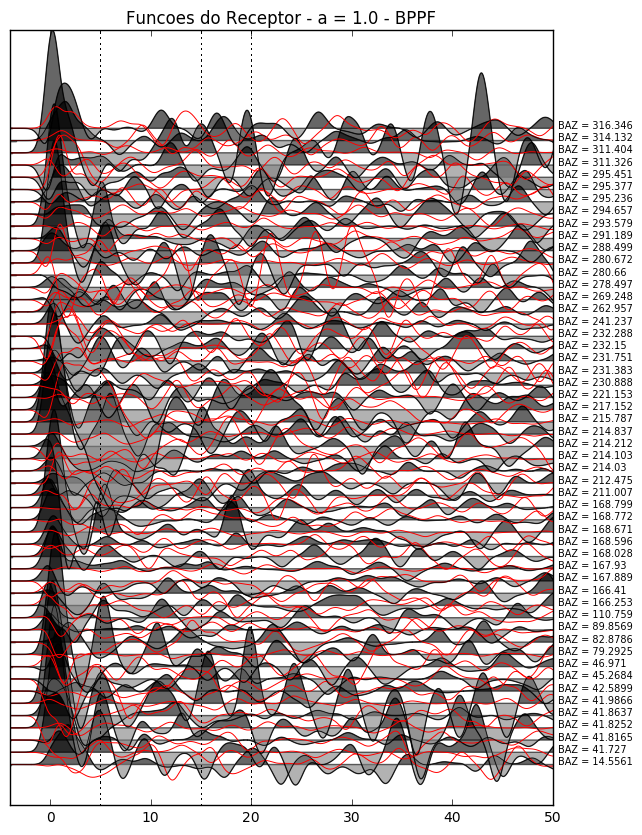

In [25]:
plt.figure(figsize = (7,10))
for j, i in enumerate(orglisl): 
    plt.plot(TF[i].times()-10,j/10+TF[i].data,'r',linewidth=0.7)
    plt.plot(RF[i].times()-10,j/10+RF[i].data,'k',linewidth=0.5)
    plt.fill_between(RF[i].times()-10,j/10+RF[i].data,j/10,where=(j/10+RF[i].data)>=j/10, facecolor='black',alpha=0.6, interpolate=True)
    plt.fill_between(RF[i].times()-10,j/10+RF[i].data,j/10,where=(j/10+RF[i].data)<=j/10, facecolor='gray',alpha=0.6, interpolate=True)
    plt.text(50.5,j/10,'BAZ = %s' % (RFbaz[i]),fontsize=7)
    plt.axvline(x=5, ymin=0, ymax=1.0, c='k',ls='dotted',linewidth=0.5)
    plt.axvline(x=15, ymin=0, ymax=1.0, c='k',ls='dotted',linewidth=0.5)
    plt.axvline(x=20, ymin=0, ymax=1.0, c='k',ls='dotted',linewidth=0.5)
    plt.yticks([])
    plt.title('Funcoes do Receptor - a = 1.0 - '+STA[z])
    plt.xlim(-4,50)

In [26]:
RFgcarc_30 = [i.stats.sac.gcarc for i in RF_30]
RFevdp_30 = [i.stats.sac.evdp for i in RF_30]
RFbaz_30 = [i.stats.sac.baz for i in RF_30]

orglisl_30 = np.argsort(RFbaz_30)

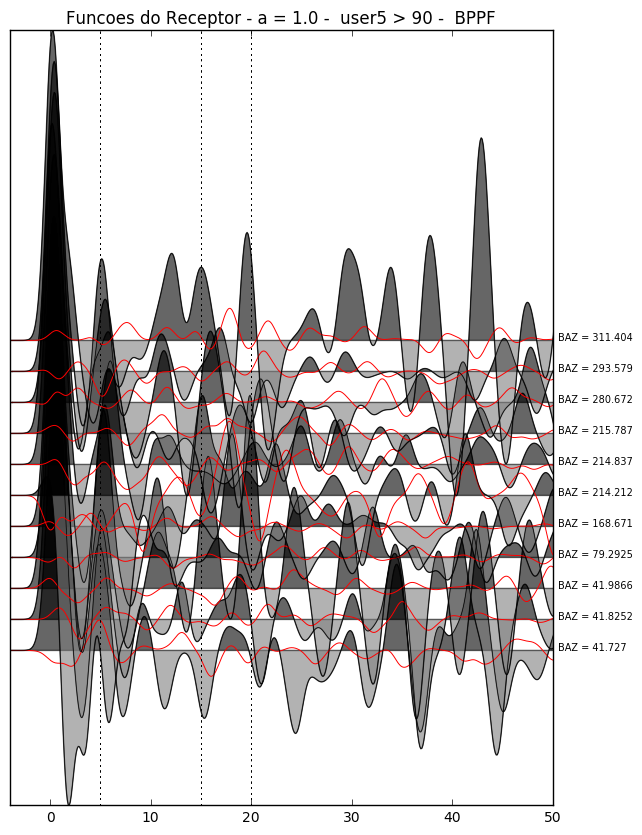

In [27]:
plt.figure(figsize = (7,10))
for j, i in enumerate(orglisl_30): 
    plt.plot(TF_30[i].times()-10,j/10+TF_30[i].data,'r',linewidth=0.7)
    plt.plot(RF_30[i].times()-10,j/10+RF_30[i].data,'k',linewidth=0.5)
    plt.fill_between(RF_30[i].times()-10,j/10+RF_30[i].data,j/10,where=(j/10+RF_30[i].data)>=j/10, facecolor='black',alpha=0.6, interpolate=True)
    plt.fill_between(RF_30[i].times()-10,j/10+RF_30[i].data,j/10,where=(j/10+RF_30[i].data)<=j/10, facecolor='gray',alpha=0.6, interpolate=True)
    #plt.text(50.5,j/10,'GCARC = %s' % (RFgcarc_30[i]),fontsize=12)
    #plt.text(50.5,j/10,'evdp = %s' % (RFevdp_30[i]),fontsize=12)
    #plt.text(50.5,k-0.2,'p = %s' % (RFp_30[i]),fontsize=12)
    plt.text(50.5,j/10,'BAZ = %s' % (RFbaz_30[i]),fontsize=7)
    plt.axvline(x=5, ymin=0, ymax=1.0, c='k',ls='dotted',linewidth=0.5)
    plt.axvline(x=15, ymin=0, ymax=1.0, c='k',ls='dotted',linewidth=0.5)
    plt.axvline(x=20, ymin=0, ymax=1.0, c='k',ls='dotted',linewidth=0.5)
    plt.yticks([])
    plt.title('Funcoes do Receptor - a = 1.0 -  user5 > 90 -  '+STA[z])
    plt.xlim(-4,50)



<h3 align="center">a = 2.5</h3>

In [28]:
RFgcarc_25 = [i.stats.sac.gcarc for i in RF_25]
RFevdp_25 = [i.stats.sac.evdp for i in RF_25]
RFbaz_25 = [i.stats.sac.baz for i in RF_25]

orglisl_25 = np.argsort(RFbaz_25)

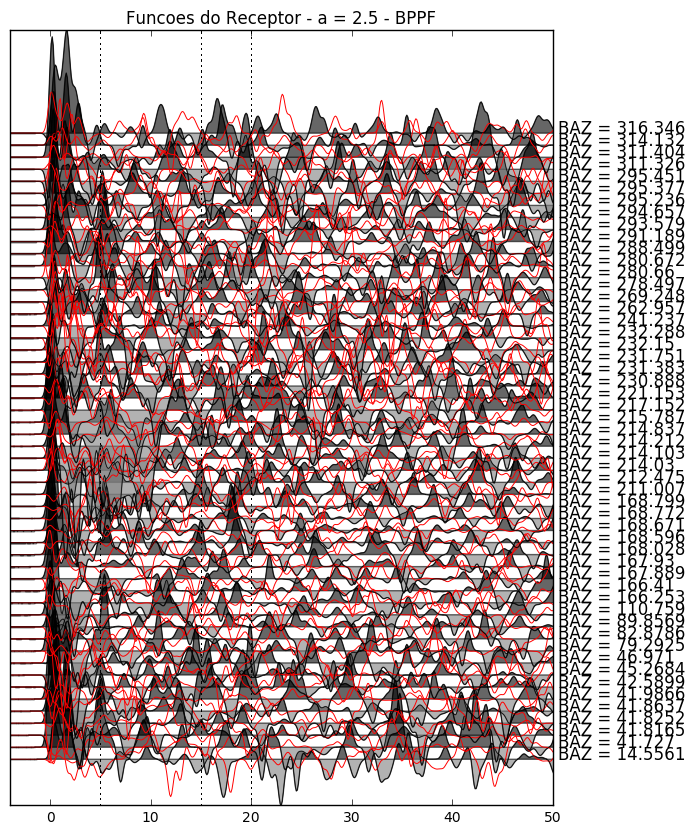

In [29]:
plt.figure(figsize = (7,10))
for j, i in enumerate(orglisl_25): 
    plt.plot(TF_25[i].times()-10,j/10+TF_25[i].data,'r',linewidth=0.7)
    plt.plot(RF_25[i].times()-10,j/10+RF_25[i].data,'k',linewidth=0.5)
    plt.fill_between(RF_25[i].times()-10,j/10+RF_25[i].data,j/10,where=(j/10+RF_25[i].data)>=j/10, facecolor='black',alpha=0.6, interpolate=True)
    plt.fill_between(RF_25[i].times()-10,j/10+RF_25[i].data,j/10,where=(j/10+RF_25[i].data)<=j/10, facecolor='gray',alpha=0.6, interpolate=True)
    #plt.text(50.5,j/10,'GCARC = %s' % (RFgcarc_25[i]),fontsize=12)
    #plt.text(50.5,j/10,'evdp = %s' % (RFevdp[i]),fontsize=12)
    #plt.text(50.5,k-0.2,'p = %s' % (RFp[i]),fontsize=12)
    plt.text(50.5,j/10,'BAZ = %s' % (RFbaz_25[i]),fontsize=12)
    plt.axvline(x=5, ymin=0, ymax=1.0, c='k',ls='dotted',linewidth=0.5)
    plt.axvline(x=15, ymin=0, ymax=1.0, c='k',ls='dotted',linewidth=0.5)
    plt.axvline(x=20, ymin=0, ymax=1.0, c='k',ls='dotted',linewidth=0.5)
    plt.yticks([])
    plt.title('Funcoes do Receptor - a = 2.5 - '+STA[z])
    plt.xlim(-4,50)

In [30]:
RFgcarc_30_25 = [i.stats.sac.gcarc for i in RF_30_25]
RFevdp_30_25 = [i.stats.sac.evdp for i in RF_30_25]
RFbaz_30_25 = [i.stats.sac.baz for i in RF_30_25]

orglisl_30_25 = np.argsort(RFbaz_30_25)

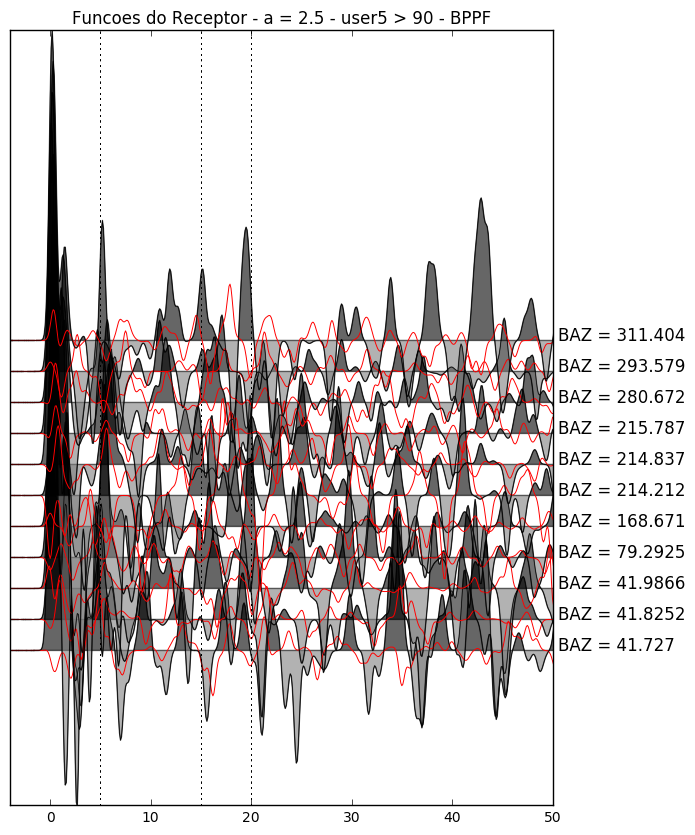

In [31]:
plt.figure(figsize = (7,10))
for j, i in enumerate(orglisl_30_25): 
    plt.plot(TF_30_25[i].times()-10,j/10+TF_30_25[i].data,'r',linewidth=0.7)
    plt.plot(RF_30_25[i].times()-10,j/10+RF_30_25[i].data,'k',linewidth=0.5)
    plt.fill_between(RF_30_25[i].times()-10,j/10+RF_30_25[i].data,j/10,where=(j/10+RF_30_25[i].data)>=j/10, facecolor='black',alpha=0.6, interpolate=True)
    plt.fill_between(RF_30_25[i].times()-10,j/10+RF_30_25[i].data,j/10,where=(j/10+RF_30_25[i].data)<=j/10, facecolor='gray',alpha=0.6, interpolate=True)
    #plt.text(50.5,j/10,'GCARC = %s' % (RFgcarc_30_25[i]),fontsize=12)
    #plt.text(50.5,j/10,'evdp = %s' % (RFevdp_30[i]),fontsize=12)
    #plt.text(50.5,k-0.2,'p = %s' % (RFp_30[i]),fontsize=12)
    plt.text(50.5,j/10,'BAZ = %s' % (RFbaz_30_25[i]),fontsize=12)
    plt.axvline(x=5, ymin=0, ymax=1.0, c='k',ls='dotted',linewidth=0.5)
    plt.axvline(x=15, ymin=0, ymax=1.0, c='k',ls='dotted',linewidth=0.5)
    plt.axvline(x=20, ymin=0, ymax=1.0, c='k',ls='dotted',linewidth=0.5)
    plt.yticks([])
    plt.title('Funcoes do Receptor - a = 2.5 - user5 > 90 - '+STA[z])
    plt.xlim(-4,50)

<h3 align="center">Empilhando as Funções do Receptor após a filtragem</h3>

<h3 align="center">a = 1.0 </h3>

In [32]:
RF_stack_30 = np.array(RF_30).sum(axis=0)/len(RF_30)

In [33]:
y = []
for i,j in enumerate(RF_30): 
    y.append(j.data)

In [34]:
min_y = [min(a) for a in zip(*y)]
max_y = [max(a) for a in zip(*y)]

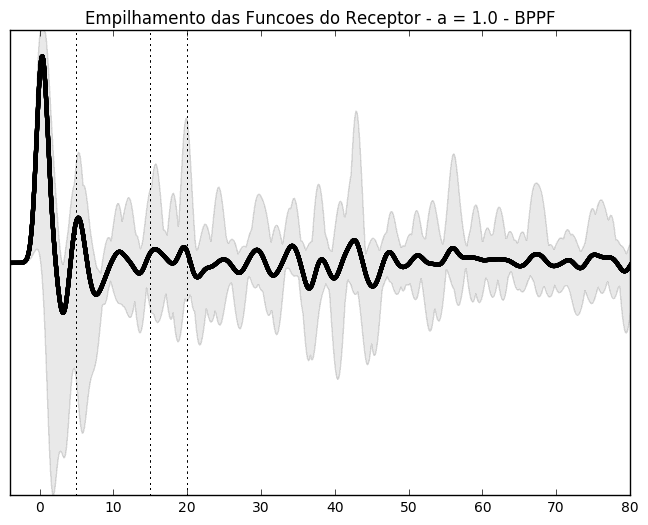

In [35]:
plt.figure(figsize = (8,6))
for j, i in enumerate(RF_30): 
    plt.plot(RF[1].times()-10,RF_stack_30,'k',linewidth=3)
    plt.fill_between(RF_30[0].times()-10,min_y,max_y, facecolor='grey',alpha=0.01, interpolate=True)
    plt.axvline(x=5, ymin=0, ymax=1.0, c='k',ls='dotted',linewidth=0.5)
    plt.axvline(x=15, ymin=0, ymax=1.0, c='k',ls='dotted',linewidth=0.5)
    plt.axvline(x=20, ymin=0, ymax=1.0, c='k',ls='dotted',linewidth=0.5)
    plt.yticks([])
    plt.title('Empilhamento das Funcoes do Receptor - a = 1.0 - '+STA[z])
    plt.xlim(-4,80)

<h3 align="center">a = 2.5 </h3>

In [36]:
RF_stack_30_25 = np.array(RF_30_25).sum(axis=0)/len(RF_30_25)

In [37]:
y_25 = []
for i,j in enumerate(RF_30_25): 
    y_25.append(j.data)

In [38]:
min_y_25 = [min(a) for a in zip(*y_25)]
max_y_25 = [max(a) for a in zip(*y_25)]

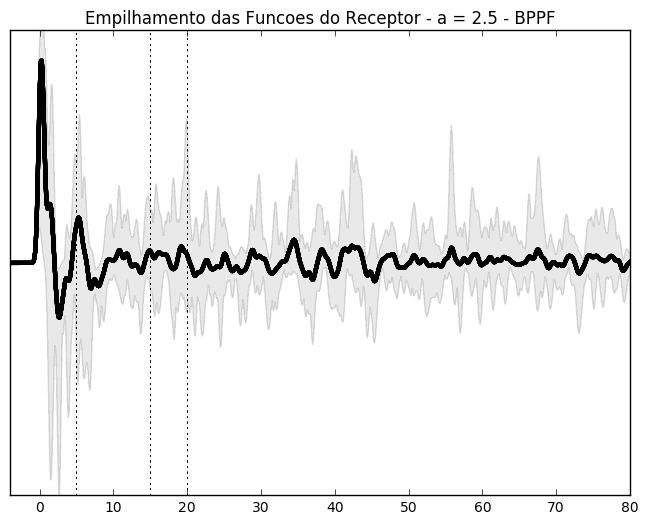

In [39]:
plt.figure(figsize = (8,6))
for j, i in enumerate(RF_30_25): 
    plt.plot(RF[1].times()-10,RF_stack_30_25,'k',linewidth=3)
    plt.fill_between(RF_30_25[0].times()-10,min_y_25,max_y_25,alpha=0.01, facecolor='grey',interpolate=True)
    plt.axvline(x=5, ymin=0, ymax=1.0, c='k',ls='dotted',linewidth=0.5)
    plt.axvline(x=15, ymin=0, ymax=1.0, c='k',ls='dotted',linewidth=0.5)
    plt.axvline(x=20, ymin=0, ymax=1.0, c='k',ls='dotted',linewidth=0.5)
    plt.yticks([])
    plt.title('Empilhamento das Funcoes do Receptor - a = 2.5 - '+STA[z])
    plt.xlim(-4,80)

<h3 align="center">Filtragem Visual das Funções do Receptor selecionadas</h3>

<h3 align="center">a = 1.0 </h3>

In [40]:
RFselect = []

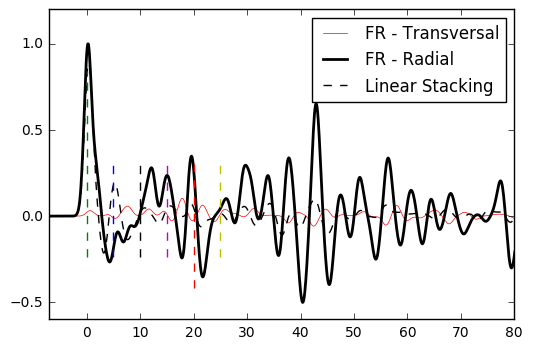

Avalie as Funçoes do Receptor (1 = Bom, 0 = Ruim) = 0


In [41]:
for j, i in enumerate(orglisl_30): 
    plt.plot(TF_30[i].times()-10,TF_30[i].data,'r',linewidth=0.5,label='FR - Transversal')
    plt.plot(RF_30[i].times()-10,RF_30[i].data,'k',linewidth=2,label='FR - Radial')
    plt.plot(RF[1].times()-10,RF_stack_30,'--k',linewidth=1,label='Linear Stacking')
    plt.legend()
    plt.axvline(x=0, ymin=0.2, ymax=0.8, ls='dashed',c='g')
    plt.axvline(x=5, ymin=0.2, ymax=0.5, ls='dashed',c='b')
    plt.axvline(x=10, ymin=0.2, ymax=0.5, ls='dashed',c='k')
    plt.axvline(x=15, ymin=0.2, ymax=0.5, ls='dashed',c='m')
    plt.axvline(x=20, ymin=0.1, ymax=0.5, ls='dashed',c='r')    
    plt.axvline(x=25, ymin=0.2, ymax=0.5, ls='dashed',c='y')    
    plt.xlim(-7,80)
    time.sleep(1.0)
    display.clear_output(wait=True)
    plt.show()
    RFselect += input("Avalie as Funçoes do Receptor (1 = Bom, 0 = Ruim) = ")

In [42]:
RFRbom_30 = []
RFTbom_30 = []
RFbomname_30 = []
orglisl_bom_30 = []
new_RFfilter = []

In [43]:
new_RFfilter = [True if x =='1' else False for x in RFselect]

In [44]:
RFRbom_30 = list(itertools.compress(RF_30, new_RFfilter))
RFTbom_30 = list(itertools.compress(TF_30, new_RFfilter))
RFbomname_30 = list(itertools.compress(RF_name_30, new_RFfilter))

In [45]:
RF_bom_gcarc_30 = [i.stats.sac.gcarc for i in RFRbom_30]
RF_bom_baz_30 = [i.stats.sac.baz for i in RFRbom_30]

orglisl_bom_30 = np.argsort(RF_bom_baz_30)

In [46]:
orglisl_bom_30

array([2, 0, 1, 3, 4])

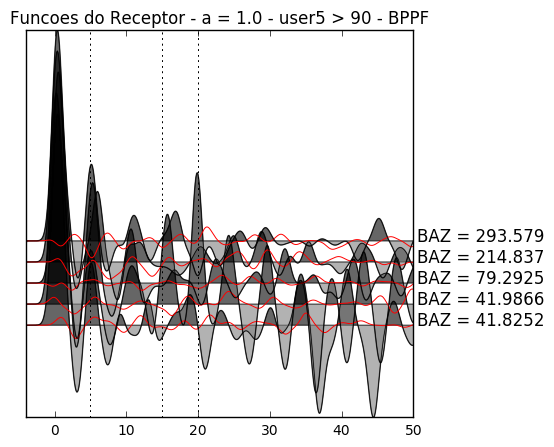

In [47]:
plt.figure(figsize = (5,5))
for j, i in enumerate(orglisl_bom_30): 
    plt.plot(RFTbom_30[i].times()-10,j/10+RFTbom_30[i].data,'r',linewidth=0.7)
    plt.plot(RFRbom_30[i].times()-10,j/10+RFRbom_30[i].data,'k',linewidth=0.5)
    plt.fill_between(RFRbom_30[i].times()-10,j/10+RFRbom_30[i].data,j/10,where=(j/10+RFRbom_30[i].data)>=j/10, facecolor='black',alpha=0.6, interpolate=True)
    plt.fill_between(RFRbom_30[i].times()-10,j/10+RFRbom_30[i].data,j/10,where=(j/10+RFRbom_30[i].data)<=j/10, facecolor='gray',alpha=0.6, interpolate=True)
    #plt.text(50.5,j/10,'GCARC = %s' % (RFgcarc_30_25[i]),fontsize=12)
    #plt.text(50.5,j/10,'evdp = %s' % (RFevdp_30[i]),fontsize=12)
    #plt.text(50.5,k-0.2,'p = %s' % (RFp_30[i]),fontsize=12)
    plt.text(50.5,j/10,'BAZ = %s' % (RF_bom_baz_30[i]),fontsize=12)
    plt.axvline(x=5, ymin=0, ymax=1.0, c='k',ls='dotted',linewidth=0.5)
    plt.axvline(x=15, ymin=0, ymax=1.0, c='k',ls='dotted',linewidth=0.5)
    plt.axvline(x=20, ymin=0, ymax=1.0, c='k',ls='dotted',linewidth=0.5)
    plt.yticks([])
    plt.title('Funcoes do Receptor - a = 1.0 - user5 > 90 - '+STA[z])
    plt.xlim(-4,50)

In [48]:
RF_stack_30_final = np.array(RFRbom_30).sum(axis=0)/len(RFRbom_30)

In [49]:
RFT_stack_30_final = np.array(RFTbom_30).sum(axis=0)/len(RFTbom_30)

In [50]:
RF_stack_30_final_user8 = sum([i.stats.sac.user8 for i in RFRbom_30])/len(RFRbom_30)

In [51]:
y_30_final = []
for i,j in enumerate(RFRbom_30): 
    y_30_final.append(j.data)

In [52]:
min_y_30_final = [min(a) for a in zip(*y_30_final)]
max_y_30_final = [max(a) for a in zip(*y_30_final)]

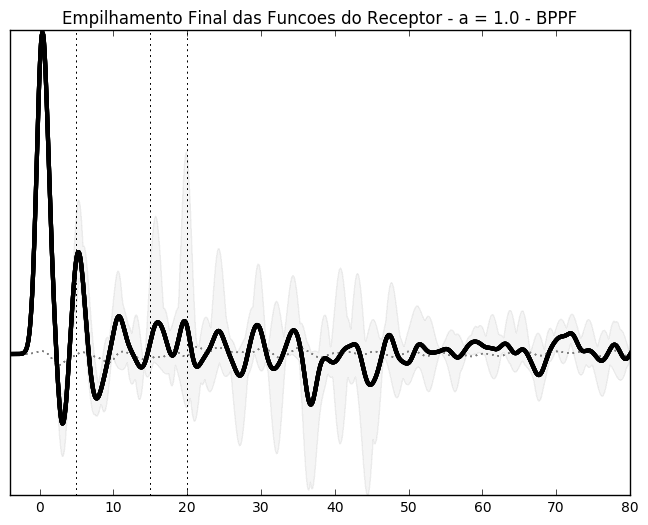

In [53]:
plt.figure(figsize = (8,6))
for j, i in enumerate(RFRbom_30): 
    plt.plot(RF[1].times()-10,RFT_stack_30_final,'grey',ls='dotted',linewidth=1)
    plt.plot(RF[1].times()-10,RF_stack_30_final,'k',linewidth=3)
    plt.fill_between(RFRbom_30[0].times()-10,min_y_30_final,max_y_30_final,alpha=0.01, facecolor='grey',interpolate=True)
    plt.axvline(x=5, ymin=0, ymax=1.0, c='k',ls='dotted',linewidth=0.5)
    plt.axvline(x=15, ymin=0, ymax=1.0, c='k',ls='dotted',linewidth=0.5)
    plt.axvline(x=20, ymin=0, ymax=1.0, c='k',ls='dotted',linewidth=0.5)
    plt.yticks([])
    plt.title('Empilhamento Final das Funcoes do Receptor - a = 1.0 - '+STA[z])
    plt.xlim(-4,80)

Salvando as Funcoes do Receptor:

In [ ]:
for i,j in enumerate(RFRbom_30):
    header = {'kstnm': j.stats.sac.kstnm,'kcmpnm':j.stats.sac.kcmpnm,'stla': j.stats.sac.stla,'stlo': j.stats.sac.stlo,
              'evdp': j.stats.sac.evdp,'evla': j.stats.sac.evla,'evlo': j.stats.sac.evlo,'mag':j.stats.sac.mag,
              'nzhour': j.stats.sac.nzhour,'nzjday': j.stats.sac.nzjday,'nzmin': j.stats.sac.nzmin,'nzmsec': j.stats.sac.nzmsec,
              'nzyear': j.stats.sac.nzyear,'dist':j.stats.sac.dist, 'gcarc': j.stats.sac.gcarc,'az': j.stats.sac.az,
              'baz':j.stats.sac.baz,'user8':j.stats.sac.user8,'delta': j.stats.sac.delta}
    sac = op.io.sac.SACTrace(data=j.data, **header)
    sac.write('/home/diogo/dados_doutorado/parnaiba_basin/redeBP-BB/RF_Zhu_Kanamori/gcarc_30_1.0/'+STA[z]+'/'+RFbomname_30[i]+'.eqr')

In [ ]:
for i,j in enumerate(RFTbom_30):
    header = {'kstnm': j.stats.sac.kstnm,'kcmpnm':j.stats.sac.kcmpnm,'stla': j.stats.sac.stla,'stlo': j.stats.sac.stlo,
              'evdp': j.stats.sac.evdp,'evla': j.stats.sac.evla,'evlo': j.stats.sac.evlo,'mag':j.stats.sac.mag,
              'nzhour': j.stats.sac.nzhour,'nzjday': j.stats.sac.nzjday,'nzmin': j.stats.sac.nzmin,'nzmsec': j.stats.sac.nzmsec,
              'nzyear': j.stats.sac.nzyear,'dist':j.stats.sac.dist, 'gcarc': j.stats.sac.gcarc,'az': j.stats.sac.az,
              'baz':j.stats.sac.baz,'user8':j.stats.sac.user8,'delta': j.stats.sac.delta}
    sac = op.io.sac.SACTrace(data=j.data, **header)
    sac.write('/home/diogo/dados_doutorado/parnaiba_basin/redeBP-BB/RF_Zhu_Kanamori/gcarc_30_1.0/'+STA[z]+'/'+RFbomname_30[i]+'.eqt')

Salvando o Empilhamento Final das Funcoes do Receptor:

In [ ]:
header = {'kstnm': RFRbom_30[0].stats.sac.kstnm,'kcmpnm':RFRbom_30[0].stats.sac.kcmpnm,'stla': RFRbom_30[0].stats.sac.stla,
          'stlo': RFRbom_30[0].stats.sac.stlo,'user8':RF_stack_30_final_user8,'delta': RFRbom_30[0].stats.sac.delta}
sac = op.io.sac.SACTrace(data=RF_stack_30_final, **header)
sac.write('/home/diogo/dados_doutorado/parnaiba_basin/redeBP-BB/joint_inversion/gcarc_30_1.0/'+STA[z]+'/BP.'+STA[z]+'.T:a=1.0.eqr')

In [ ]:
header = {'kstnm': RFRbom_30[0].stats.sac.kstnm,'kcmpnm':RFRbom_30[0].stats.sac.kcmpnm,'stla': RFRbom_30[0].stats.sac.stla,
          'stlo': RFRbom_30[0].stats.sac.stlo,'user8':RF_stack_30_final_user8,'delta': RFRbom_30[0].stats.sac.delta}
sac = op.io.sac.SACTrace(data=RFT_stack_30_final, **header)
sac.write('/home/diogo/dados_doutorado/parnaiba_basin/redeBP-BB/joint_inversion/gcarc_30_1.0/'+STA[z]+'/BP.'+STA[z]+'.T:a=1.0.eqt')

<h3 align="center">a = 2.5 </h3>

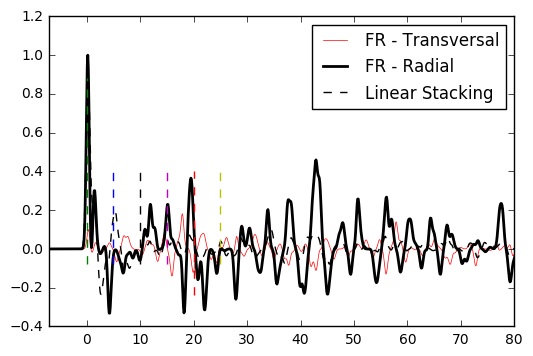

Avalie as Funçoes do Receptor (1 = Bom, 0 = Ruim) = 0


In [54]:
RFselect = []
for j, i in enumerate(orglisl_30_25): 
    plt.plot(TF_30_25[i].times()-10,TF_30_25[i].data,'r',linewidth=0.5,label='FR - Transversal')
    plt.plot(RF_30_25[i].times()-10,RF_30_25[i].data,'k',linewidth=2,label='FR - Radial')
    plt.plot(RF[1].times()-10,RF_stack_30_25,'--k',linewidth=1,label='Linear Stacking')
    plt.legend()
    plt.axvline(x=0, ymin=0.2, ymax=0.8, ls='dashed',c='g')
    plt.axvline(x=5, ymin=0.2, ymax=0.5, ls='dashed',c='b')
    plt.axvline(x=10, ymin=0.2, ymax=0.5, ls='dashed',c='k')
    plt.axvline(x=15, ymin=0.2, ymax=0.5, ls='dashed',c='m')
    plt.axvline(x=20, ymin=0.1, ymax=0.5, ls='dashed',c='r')    
    plt.axvline(x=25, ymin=0.2, ymax=0.5, ls='dashed',c='y')    
    plt.xlim(-7,80)
    time.sleep(1.0)
    display.clear_output(wait=True)
    plt.show()
    RFselect += input("Avalie as Funçoes do Receptor (1 = Bom, 0 = Ruim) = ")

In [55]:
RFRbom_30_25 = []
RFTbom_30_25 = []
RFBomname_30_25 = []
orglisl_bom_30_25 = []
new_RFfilter = []

In [56]:
new_RFfilter = [True if x =='1' else False for x in RFselect]

In [57]:
RFRbom_30_25 = list(itertools.compress(RF_30_25, new_RFfilter))
RFTbom_30_25 = list(itertools.compress(TF_30_25, new_RFfilter))
RFBomname_30_25 = list(itertools.compress(RF_name_30_25, new_RFfilter))

In [58]:
RF_bom_gcarc_30_25 = [i.stats.sac.gcarc for i in RFRbom_30_25]
RF_bom_baz_30_25 = [i.stats.sac.baz for i in RFRbom_30_25]

orglisl_bom_30_25 = np.argsort(RF_bom_baz_30_25)

In [59]:
orglisl_bom_30_25

array([3, 1, 2, 0, 4])

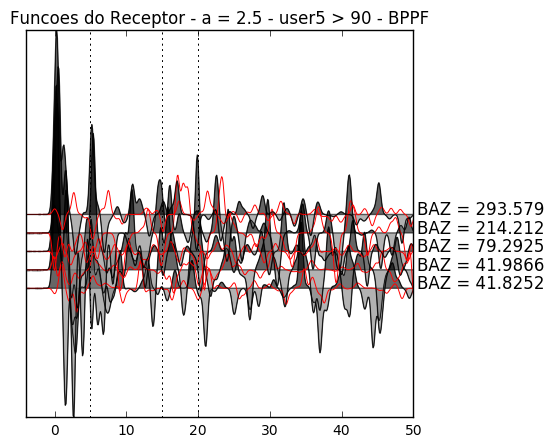

In [60]:
plt.figure(figsize = (5,5))
for j, i in enumerate(orglisl_bom_30_25): 
    plt.plot(RFTbom_30_25[i].times()-10,j/10+RFTbom_30_25[i].data,'r',linewidth=0.7)
    plt.plot(RFRbom_30_25[i].times()-10,j/10+RFRbom_30_25[i].data,'k',linewidth=0.5)
    plt.fill_between(RFRbom_30_25[i].times()-10,j/10+RFRbom_30_25[i].data,j/10,where=(j/10+RFRbom_30_25[i].data)>=j/10, facecolor='black',alpha=0.6, interpolate=True)
    plt.fill_between(RFRbom_30_25[i].times()-10,j/10+RFRbom_30_25[i].data,j/10,where=(j/10+RFRbom_30_25[i].data)<=j/10, facecolor='gray',alpha=0.6, interpolate=True)
    #plt.text(50.5,j/10,'GCARC = %s' % (RFgcarc_30_25[i]),fontsize=12)
    #plt.text(50.5,j/10,'evdp = %s' % (RFevdp_30[i]),fontsize=12)
    #plt.text(50.5,k-0.2,'p = %s' % (RFp_30[i]),fontsize=12)
    plt.text(50.5,j/10,'BAZ = %s' % (RF_bom_baz_30_25[i]),fontsize=12)
    plt.axvline(x=5, ymin=0, ymax=1.0, c='k',ls='dotted',linewidth=0.5)
    plt.axvline(x=15, ymin=0, ymax=1.0, c='k',ls='dotted',linewidth=0.5)
    plt.axvline(x=20, ymin=0, ymax=1.0, c='k',ls='dotted',linewidth=0.5)
    plt.yticks([])
    plt.title('Funcoes do Receptor - a = 2.5 - user5 > 90 - '+STA[z])
    plt.xlim(-4,50)

In [ ]:
RF_stack_30_25_final = np.array(RFRbom_30_25).sum(axis=0)/len(RFRbom_30_25)

In [ ]:
RFT_stack_30_25_final = np.array(RFTbom_30_25).sum(axis=0)/len(RFTbom_30_25)

In [ ]:
RF_stack_30_25_final_user8 = sum([i.stats.sac.user8 for i in RFRbom_30_25])/len(RFRbom_30_25)

In [ ]:
y_30_25_final = []
for i,j in enumerate(RFRbom_30_25): 
    y_30_25_final.append(j.data)

In [ ]:
min_y_30_25_final = [min(a) for a in zip(*y_30_25_final)]
max_y_30_25_final = [max(a) for a in zip(*y_30_25_final)]

In [ ]:
plt.figure(figsize = (8,6))
for j, i in enumerate(RFRbom_30_25): 
    plt.plot(RF[1].times()-10,RFT_stack_30_25_final,'grey',ls='dotted',linewidth=1)
    plt.plot(RF[1].times()-10,RF_stack_30_25_final,'k',linewidth=3)
    plt.fill_between(RF_30_25[0].times()-10,min_y_30_25_final,max_y_30_25_final,alpha=0.01, facecolor='grey',interpolate=True)
    plt.axvline(x=5, ymin=0, ymax=1.0, c='k',ls='dotted',linewidth=0.5)
    plt.axvline(x=15, ymin=0, ymax=1.0, c='k',ls='dotted',linewidth=0.5)
    plt.axvline(x=20, ymin=0, ymax=1.0, c='k',ls='dotted',linewidth=0.5)
    plt.yticks([])
    plt.title('Empilhamento Final das Funcoes do Receptor - a = 2.5 - '+STA[z])
    plt.xlim(-4,60)

Salvando as Funcoes do Receptor:

In [ ]:
for i,j in enumerate(RFRbom_30_25):
    header = {'kstnm': j.stats.sac.kstnm,'kcmpnm':j.stats.sac.kcmpnm,'stla': j.stats.sac.stla,'stlo': j.stats.sac.stlo,
              'evdp': j.stats.sac.evdp,'evla': j.stats.sac.evla,'evlo': j.stats.sac.evlo,'mag':j.stats.sac.mag,
              'nzhour': j.stats.sac.nzhour,'nzjday': j.stats.sac.nzjday,'nzmin': j.stats.sac.nzmin,'nzmsec': j.stats.sac.nzmsec,
              'nzyear': j.stats.sac.nzyear,'dist':j.stats.sac.dist, 'gcarc': j.stats.sac.gcarc,'az': j.stats.sac.az,
              'baz':j.stats.sac.baz,'user8':j.stats.sac.user8, 'delta': j.stats.sac.delta}
    sac = op.io.sac.SACTrace(data=j.data, **header)
    sac.write('/home/diogo/dados_doutorado/parnaiba_basin/redeBP-BB/RF_Zhu_Kanamori/gcarc_30_2.5/'+STA[z]+'/'+RF_name_30_25[i]+'.eqr')

In [ ]:
for i,j in enumerate(RFTbom_30_25):
    header = {'kstnm': j.stats.sac.kstnm,'kcmpnm':j.stats.sac.kcmpnm,'stla': j.stats.sac.stla,'stlo': j.stats.sac.stlo,
              'evdp': j.stats.sac.evdp,'evla': j.stats.sac.evla,'evlo': j.stats.sac.evlo,'mag':j.stats.sac.mag,
              'nzhour': j.stats.sac.nzhour,'nzjday': j.stats.sac.nzjday,'nzmin': j.stats.sac.nzmin,'nzmsec': j.stats.sac.nzmsec,
              'nzyear': j.stats.sac.nzyear,'dist':j.stats.sac.dist, 'gcarc': j.stats.sac.gcarc,'az': j.stats.sac.az,
              'baz':j.stats.sac.baz,'user8':j.stats.sac.user8,'delta': j.stats.sac.delta}
    sac = op.io.sac.SACTrace(data=j.data, **header)
    sac.write('/home/diogo/dados_doutorado/parnaiba_basin/redeBP-BB/RF_Zhu_Kanamori/gcarc_30_2.5/'+STA[z]+'/'+RF_name_30_25[i]+'.eqt')

Salvando o Empilhamento Final das Funcoes do Receptor:

In [ ]:
header = {'kstnm': RFRbom_30_25[0].stats.sac.kstnm,'kcmpnm':RFRbom_30_25[0].stats.sac.kcmpnm,'stla': RFRbom_30_25[0].stats.sac.stla,
          'stlo': RFRbom_30_25[0].stats.sac.stlo,'user8':RF_stack_30_25_final_user8,'delta': RFRbom_30_25[0].stats.sac.delta}
sac = op.io.sac.SACTrace(data=RF_stack_30_25_final, **header)
sac.write('/home/diogo/dados_doutorado/parnaiba_basin/redeBP-BB/joint_inversion/gcarc_30_2.5/'+STA[z]+'/BP.'+STA[z]+'.T:a=2.5.eqr')

In [ ]:
header = {'kstnm': RFRbom_30_25[0].stats.sac.kstnm,'kcmpnm':RFRbom_30_25[0].stats.sac.kcmpnm,'stla': RFRbom_30_25[0].stats.sac.stla,
          'stlo': RFRbom_30_25[0].stats.sac.stlo,'user8':RF_stack_30_25_final_user8,'delta': RFRbom_30_25[0].stats.sac.delta}
sac = op.io.sac.SACTrace(data=RFT_stack_30_25_final, **header)
sac.write('/home/diogo/dados_doutorado/parnaiba_basin/redeBP-BB/joint_inversion/gcarc_30_2.5/'+STA[z]+'/BP.'+STA[z]+'.T:a=2.5.eqt')

# Figura Artigo

# 1.0

In [ ]:
list = glob.glob('/home/diogo/dados_doutorado/parnaiba_basin/redeBP-BB/RF_Zhu_Kanamori/gcarc_30_1.0/'+STA[z]+'/*.ps')

for file in list:

    root = file[:-2]
    pngfile = root + 'png'
    os.system('convert ' + file + ' ' + pngfile)

In [ ]:
# Collect all data
evlo_data = []
evla_data = []
magnitudes = [] 
for i, j in enumerate(RF_30):
    stlo_data = j.stats.sac.stlo
    stla_data = j.stats.sac.stla
    evlo_data.append(j.stats.sac.evlo)
    evla_data.append(j.stats.sac.evla)
    magnitudes.append(j.stats.sac.mag)
    
# Collect used data
evlo_data_used = []
evla_data_used = []
magnitudes_used = [] 
for i, j in enumerate(RFTbom_30):
    stlo_data_used = j.stats.sac.stlo
    stla_data_used = j.stats.sac.stla
    evlo_data_used.append(j.stats.sac.evlo)
    evla_data_used.append(j.stats.sac.evla)
    magnitudes_used.append(j.stats.sac.mag)
    
# Collect time of used data
tPs_30 = []
tPpPs_30 = [] 
tPsPs_tPpSs_30 = []
tPs_tPpPs_tPsPs_tPpSs_30 = np.genfromtxt('/home/diogo/dados_doutorado/parnaiba_basin/redeBP-BB/RF_Zhu_Kanamori/gcarc_30_1.0/'+STA[z]+'/tPs_tPpPs_tPsPs_tPpSs_out.txt')
for i,j in enumerate(tPs_tPpPs_tPsPs_tPpSs_30):
    tPs_30.append(j[1])
    tPpPs_30.append(j[2]) 
    tPsPs_tPpSs_30.append(j[3])   
tPs_30_stack = sum(tPs_30)/len(tPs_30)
tPpPs_30_stack = sum(tPpPs_30)/len(tPpPs_30)
tPsPs_tPpSs_30_stack = sum(tPsPs_tPpSs_30)/len(tPsPs_tPpSs_30)

RFRbom_30_plot = op.read('/home/diogo/dados_doutorado/parnaiba_basin/redeBP-BB/RF_Zhu_Kanamori/gcarc_30_1.0/'+STA[z]+'/*.eqr')
RFTbom_30_plot = op.read('/home/diogo/dados_doutorado/parnaiba_basin/redeBP-BB/RF_Zhu_Kanamori/gcarc_30_1.0/'+STA[z]+'/*.eqt')
RF_bom_baz_30_plot = [i.stats.sac.baz for i in RFRbom_30_plot]
orglisl_bom_30_plot = np.argsort(RF_bom_baz_30_plot)

RFR_stack_30_final_plot = op.read('/home/diogo/dados_doutorado/parnaiba_basin/redeBP-BB/joint_inversion/gcarc_30_1.0/'+STA[z]+'/*.eqr')
RFT_stack_30_final_plot = op.read('/home/diogo/dados_doutorado/parnaiba_basin/redeBP-BB/joint_inversion/gcarc_30_1.0/'+STA[z]+'/*.eqt')

In [ ]:
fig = plt.figure(figsize=(30,20),facecolor='white')
# set up subplot grid
gridspec.GridSpec(3, 3, wspace=5,hspace=10)


plt.subplot2grid((2,2), (0,0))
for j, i in enumerate(orglisl_bom_30_plot): 
    plt.plot(RFTbom_30_plot[i].times()-10,j/5+RFTbom_30_plot[i].data,'r',linewidth=0.7)
    plt.plot(RFRbom_30_plot[i].times()-10,j/5+RFRbom_30_plot[i].data,'k',linewidth=0.5)
    plt.fill_between(RFRbom_30_plot[i].times()-10,j/5+RFRbom_30_plot[i].data,j/5,where=(j/5+RFRbom_30_plot[i].data)>=j/5, facecolor='black',alpha=0.6, interpolate=True)
    plt.fill_between(RFRbom_30_plot[i].times()-10,j/5+RFRbom_30_plot[i].data,j/5,where=(j/5+RFRbom_30_plot[i].data)<=j/5, facecolor='gray',alpha=0.6, interpolate=True)
    #plt.text(50.5,j/10,'GCARC = %s' % (RFgcarc_30_25[i]),fontsize=12)
    #plt.text(50.5,j/10,'evdp = %s' % (RFevdp_30[i]),fontsize=12)
    #plt.text(50.5,k-0.2,'p = %s' % (RFp_30[i]),fontsize=12)
    plt.text(40.5,j/5,'BAZ = %s' % (RF_bom_baz_30_plot[i]),fontsize=12)
    plt.yticks([])
    plt.title('Funcoes do Receptor - a = 1.0 - '+STA[z])
    plt.xlim(-4,40)

# small subplot 1
plt.subplot2grid((2,2), (0,1))
m = Basemap(resolution='l',projection='ortho',lat_0=-5.,lon_0=-45.)
m.bluemarble()
m.drawmapboundary()
m.drawcoastlines(linewidth=1.5)
m.drawmeridians(np.arange(0, 360, 30))
m.drawparallels(np.arange(-90, 90, 30))

stx,sty = m(stlo_data, stla_data)
m.plot(stx,sty , '^r', markersize=12)
plt.text(stx-250000,sty+200000,STA[z],color='w')

m.tissot(stlo_data,stla_data,30,50,edgecolor='w',ls='dashed',linewidth=2,facecolor='none')
#m.tissot(stlo,stla,90,50,zorder=10,edgecolor='w',linewidth=2,facecolor='none')

for lon, lat, mag in zip(evlo_data, evla_data, magnitudes):
    x,y = m(lon, lat)
    msize = mag*2
    m.plot(x, y, '*',markersize=msize,markeredgecolor='grey',markerfacecolor='grey')

for lon, lat, mag in zip(evlo_data_used, evla_data_used, magnitudes_used):
    x,y = m(evlo_data_used, evla_data_used)
    msize = mag*2
    m.plot(x, y, '*',markersize=msize,markeredgecolor='y',markerfacecolor='y')

    
# small subplot 2
plt.subplot2grid((2,2), (1,0))
plt.plot(RFT_stack_30_final_plot[0].times()-10,RFT_stack_30_final_plot[0].data,'r',linewidth=3)
plt.plot(RFR_stack_30_final_plot[0].times()-10,RFR_stack_30_final_plot[0].data,'k',linewidth=3)
plt.fill_between(RFR_stack_30_final_plot[0].times()-10,0,RFR_stack_30_final_plot[0].data,where=(RFR_stack_30_final_plot[0].data)>=0, facecolor='black',alpha=0.6, interpolate=True)
plt.fill_between(RFR_stack_30_final_plot[0].times()-10,0,RFR_stack_30_final_plot[0].data,where=(RFR_stack_30_final_plot[0].data)<=0, facecolor='gray',alpha=0.6, interpolate=True)    
#plt.fill_between(RFRbom_30[0].times()-10,min_y_30_final,max_y_30_final,alpha=0.01, facecolor='grey',interpolate=True)
plt.axvline(x=tPs_30_stack, ymin=0.3, ymax=0.6, c='grey',linewidth=4)
plt.axvline(x=tPpPs_30_stack, ymin=0.2, ymax=0.4, c='grey',linewidth=4)
plt.axvline(x=tPsPs_tPpSs_30_stack, ymin=0.2, ymax=0.4, c='grey',linewidth=4)
plt.yticks([])
plt.title('Empilhamento das Funcoes do Receptor - a = 1.0 - '+STA[z])
plt.xlim(-4,40)
plt.ylim(-0.5,1)


    
# small subplot 3
plt.subplot2grid((2,2), (1,1))
im = plt.imread(get_sample_data('/home/diogo/dados_doutorado/parnaiba_basin/redeBP-BB/RF_Zhu_Kanamori/gcarc_30_1.0/'+STA[z]+'/pgplot.png'))
plt.axis("off")
plt.imshow(im)


plt.tight_layout()

plt.savefig('/home/diogo/dados_doutorado/parnaiba_basin/redeBP-BB/RF_Zhu_Kanamori/gcarc_30_1.0/'+STA[z]+'/mosaico.png')

# 2.5

In [ ]:
list = glob.glob('/home/diogo/dados_doutorado/parnaiba_basin/redeBP-BB/RF_Zhu_Kanamori/gcarc_30_2.5/'+STA[z]+'/*.ps')

for file in list:

    root = file[:-2]
    pngfile = root + 'png'
    os.system('convert ' + file + ' ' + pngfile)

In [ ]:
# Collect all data
evlo_data = []
evla_data = []
magnitudes = [] 
for i, j in enumerate(RF_30_25):
    stlo_data = j.stats.sac.stlo
    stla_data = j.stats.sac.stla
    evlo_data.append(j.stats.sac.evlo)
    evla_data.append(j.stats.sac.evla)
    magnitudes.append(j.stats.sac.mag)
    
# Collect used data
evlo_data_used = []
evla_data_used = []
magnitudes_used = [] 
for i, j in enumerate(RFTbom_30_25):
    stlo_data_used = j.stats.sac.stlo
    stla_data_used = j.stats.sac.stla
    evlo_data_used.append(j.stats.sac.evlo)
    evla_data_used.append(j.stats.sac.evla)
    magnitudes_used.append(j.stats.sac.mag)
    
# Collect time of used data
tPs_30_25 = []
tPpPs_30_25 = [] 
tPsPs_tPpSs_30_25 = []
tPs_tPpPs_tPsPs_tPpSs_30_25 = np.genfromtxt('/home/diogo/dados_doutorado/parnaiba_basin/redeBP-BB/RF_Zhu_Kanamori/gcarc_30_1.0/'+STA[z]+'/tPs_tPpPs_tPsPs_tPpSs_out.txt')
for i,j in enumerate(tPs_tPpPs_tPsPs_tPpSs_30_25):
    tPs_30_25.append(j[1])
    tPpPs_30_25.append(j[2]) 
    tPsPs_tPpSs_30_25.append(j[3])  
    
tPs_30_25_stack = sum(tPs_30_25)/len(tPs_30_25)
tPpPs_30_25_stack = sum(tPpPs_30_25)/len(tPpPs_30_25)
tPsPs_tPpSs_30_25_stack = sum(tPsPs_tPpSs_30_25)/len(tPsPs_tPpSs_30_25)

In [ ]:
fig = plt.figure(figsize=(30,20),facecolor='white')
# set up subplot grid
gridspec.GridSpec(3, 3, wspace=5,hspace=10)


plt.subplot2grid((2,2), (0,0))
for j, i in enumerate(orglisl_bom_30_25): 
    plt.plot(RFTbom_30_25[i].times()-10,j/5+RFTbom_30_25[i].data,'r',linewidth=0.7)
    plt.plot(RFRbom_30_25[i].times()-10,j/5+RFRbom_30_25[i].data,'k',linewidth=0.5)
    plt.fill_between(RFRbom_30_25[i].times()-10,j/5+RFRbom_30_25[i].data,j/5,where=(j/5+RFRbom_30_25[i].data)>=j/5, facecolor='black',alpha=0.6, interpolate=True)
    plt.fill_between(RFRbom_30_25[i].times()-10,j/5+RFRbom_30_25[i].data,j/5,where=(j/5+RFRbom_30_25[i].data)<=j/5, facecolor='gray',alpha=0.6, interpolate=True)
    #plt.text(50.5,j/10,'GCARC = %s' % (RFgcarc_30_25[i]),fontsize=12)
    #plt.text(50.5,j/10,'evdp = %s' % (RFevdp_30[i]),fontsize=12)
    #plt.text(50.5,k-0.2,'p = %s' % (RFp_30[i]),fontsize=12)
    plt.text(40.5,j/5,'BAZ = %s' % (RF_bom_baz_30_25[i]),fontsize=12)
    plt.yticks([])
    plt.title('Funcoes do Receptor - a = 2.5 - '+STA[z])
    plt.xlim(-4,40)

# small subplot 1
plt.subplot2grid((2,2), (0,1))
m = Basemap(resolution='l',projection='ortho',lat_0=-5.,lon_0=-45.)
m.bluemarble()
m.drawmapboundary()
m.drawcoastlines(linewidth=1.5)
m.drawmeridians(np.arange(0, 360, 30))
m.drawparallels(np.arange(-90, 90, 30))

stx,sty = m(stlo_data, stla_data)
m.plot(stx,sty , '^r', markersize=12)
plt.text(stx-250000,sty+200000,STA[z],color='w')

m.tissot(stlo_data,stla_data,30,50,edgecolor='w',ls='dashed',linewidth=2,facecolor='none')
#m.tissot(stlo,stla,90,50,zorder=10,edgecolor='w',linewidth=2,facecolor='none')

for lon, lat, mag in zip(evlo_data, evla_data, magnitudes):
    x,y = m(lon, lat)
    msize = mag*2
    m.plot(x, y, '*',markersize=msize,markeredgecolor='grey',markerfacecolor='grey')

for lon, lat, mag in zip(evlo_data_used, evla_data_used, magnitudes_used):
    x,y = m(evlo_data_used, evla_data_used)
    msize = mag*2
    m.plot(x, y, '*',markersize=msize,markeredgecolor='y',markerfacecolor='y')

    
# small subplot 2
plt.subplot2grid((2,2), (1,0))
plt.plot(RF[1].times()-10,RFT_stack_30_25_final,'r',linewidth=3)
plt.plot(RF[1].times()-10,RF_stack_30_25_final,'k',linewidth=3)
plt.fill_between(RF[1].times()-10,0,RF_stack_30_25_final,where=(RF_stack_30_25_final)>=0, facecolor='black',alpha=0.6, interpolate=True)
plt.fill_between(RF[1].times()-10,0,RF_stack_30_25_final,where=(RF_stack_30_25_final)<=0, facecolor='gray',alpha=0.6, interpolate=True)    
plt.fill_between(RFRbom_30_25[0].times()-10,min_y_30_25_final,max_y_30_25_final,alpha=0.01, facecolor='grey',interpolate=True)
plt.axvline(x=tPs_30_25_stack, ymin=0.3, ymax=0.6, c='grey',linewidth=4)
plt.axvline(x=tPpPs_30_25_stack, ymin=0.2, ymax=0.5, c='grey',linewidth=4)
plt.axvline(x=tPsPs_tPpSs_30_25_stack, ymin=0.1, ymax=0.4, c='grey',linewidth=4)
plt.yticks([])
plt.title('Empilhamento Final das Funcoes do Receptor - a = 2.5 - '+STA[z])
plt.xlim(-4,40)
#plt.ylim(-0.5,1)
    
# small subplot 3
plt.subplot2grid((2,2), (1,1))
im = plt.imread(get_sample_data('/home/diogo/dados_doutorado/parnaiba_basin/redeBP-BB/RF_Zhu_Kanamori/gcarc_30_2.5/'+STA[z]+'/pgplot.png'))
plt.axis("off")
plt.imshow(im)


plt.tight_layout()

plt.savefig('/home/diogo/dados_doutorado/parnaiba_basin/redeBP-BB/RF_Zhu_Kanamori/gcarc_30_2.5/'+STA[z]+'/mosaico.png')